<a href="https://www.kaggle.com/code/monicaghuge/teco-customer-churn?scriptVersionId=173298328" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 # About Dataset

* Telco Churn refers to the phenomenon of customer churning from one compony to another company (telco) or termination of their subscription altogether.*
* Churn can occure for various reason ,such as dissatification of service quality,,high price,availibilty of best offers from compititors or change in customers need. *
* Telco componies often consider churn as significant concern becouse aquaring new customers can be more costly and time consuming than retaining existing ones .Therefore reducing churn and retaining customer important goals for telcompony.*
* This Model focus on analysis and ML Model Building* 

**ATTRIBUTION**

* customerID: Customer ID
* gender: Whether the customer is a male or a female
* Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* Phone Service: Whether the customer has a phone service or not (Yes, No)
* Multiple Lines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* Multiple Lines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* Online Security: Whether the customer has online security or not (Yes, No, No internet service)
* Online Backup: Whether the customer has online backup or not (Yes, No, No internet service)
* Device Protection: Whether the customer has device protection or not (Yes, No, No internet service)
* Tech Support: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* Paperless Billing: Whether the customer has paperless billing or not (Yes, No)
* Payment Method: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* Monthly Charges: The amount charged to the customer monthly
* Churn Label: Whether the customer churned or not (Yes or No)
 

**PROBLEM**

* Companies need to invest (expense costs) to get new customers
* When a customer leaves the service (churns), it indicates a loss of investment
* Cost, time, and effort need to be channelled to replace customers who have left the service
* Acquiring new customers is often more difficult and more expensive than retaining existing customers
* 

**OBJECTIVES**

* Predict whether customers will continue to use the service or will leave the service
* Understanding the customer behaviors:
   *What keeps customers using the service
   *What makes customers leave the service             

# IMPORT LIBRARY          

In [3]:
pip install inflection

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import inflection
from scipy.stats import chi2
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
# imp matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Evaluating and Hypertunning Parameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

# READ DATASET

In [5]:
df=pd.read_csv('/kaggle/input/telo-customer-churn-csv/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(4).T

,0,1,2,3
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW
gender,Female,Male,Male,Male
SeniorCitizen,0,0,0,0
Partner,Yes,No,No,No
Dependents,No,No,No,No
tenure,1,34,2,45
PhoneService,No,Yes,Yes,No
MultipleLines,No phone service,No,No,No phone service
InternetService,DSL,DSL,DSL,DSL
OnlineSecurity,No,Yes,Yes,Yes


In [6]:
# Check the shape of dataset
df.shape

(7043, 21)

In [7]:
# To check the the information(Non-null) of the dataset ,
#Here we are using verbose becouse we have large dataset which is on true mode
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* we have 21 columns, and 7043
* we have 3 columns have numeric values, and 18 columns have categoricl values
* we can see that we have no null values as all columns ahve same count of non_null values
    

In [8]:
# Checks the data types present in the dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Drope the customerID column which is not required here.
cols_drop=df.drop(columns=['customerID'],inplace=True)
# check shape of dataset after droping CusomerID
df.shape 


(7043, 20)

In [10]:
# Checks the columns name present in the dataset
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Here in this dataset TotalCharges is given as Object but we have convert it into float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64')
df['TotalCharges'].dtype
# Here we successesfully convert datatpe of TotalCharges into float value .

dtype('float64')

In [12]:
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce').astype('object')
df['SeniorCitizen'].dtypes

dtype('O')

In [13]:
# Check the describes of numerical columns here
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


* tenure has minimum average value is 33*  
*  75% customer of tenure have less than 55 in months.
* Average monthlycharges of the customer are more than USD 64.76 where as 25% customers pay more than USD 89.86 per months


# DATA CLEANING

In [14]:
# check the missing values
df.isnull().sum()
# so there are 11 missing values in TotalCharges Columns

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# let's check the relation of missing values of TotalCharges to the tenure
df.loc[df['tenure'] == 0, ['tenure', 'TotalCharges']]


,tenure,TotalCharges
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


> here we can see in our dataset tenure is 0 where the TotalCharges values are Totally blank or missing.It means customer haven't used any service so they dont have any charges

In [16]:
# Drop the missing values
df=df.dropna()
df['TotalCharges'].isnull().sum()
# removed the missing values 

0

In [17]:
# checks the duplicate values present in dataset
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [18]:
df.duplicated().sum()
# we have removed duplicates 

0

In [19]:
# Covariance And Correlation
print('Covariance')
display(df.cov(numeric_only=True))
print('n\Correlation')
display(df.corr(numeric_only=True))

Covariance


,tenure,MonthlyCharges,TotalCharges
tenure,601.252045,180.020052,4.587263e+04
MonthlyCharges,180.020052,903.890316,4.433524e+04
TotalCharges,45872.630987,44335.244460,5.138477e+06


n\Correlation


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.244194,0.825293
MonthlyCharges,0.244194,1.000000,0.650540
TotalCharges,0.825293,0.650540,1.000000


In [20]:
# check the value counts of target variable
df['Churn'].value_counts()*100/len(df['Churn'])

Churn
No     73.509272
Yes    26.490728
Name: count, dtype: float64

* dataset is highly imbalanced and the ratio of the data is=73:27 We analyse the data with other features while taking the targetvalues separtaly to ge som insights

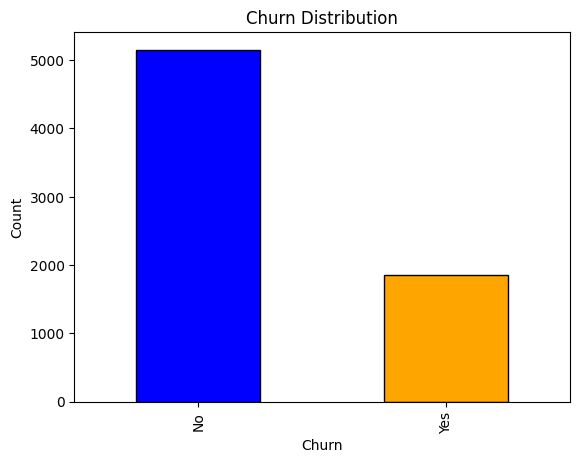

In [21]:
# Barplot for distribution of churn and retain
churn_counts = df['Churn'].value_counts()
churn_counts.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [22]:
# let's check unique values in dataset
for i in df.columns:
    print("No.of unique values in",i,"is",df[i].nunique())

No.of unique values in gender is 2
No.of unique values in SeniorCitizen is 2
No.of unique values in Partner is 2
No.of unique values in Dependents is 2
No.of unique values in tenure is 72
No.of unique values in PhoneService is 2
No.of unique values in MultipleLines is 3
No.of unique values in InternetService is 3
No.of unique values in OnlineSecurity is 3
No.of unique values in OnlineBackup is 3
No.of unique values in DeviceProtection is 3
No.of unique values in TechSupport is 3
No.of unique values in StreamingTV is 3
No.of unique values in StreamingMovies is 3
No.of unique values in Contract is 3
No.of unique values in PaperlessBilling is 2
No.of unique values in PaymentMethod is 4
No.of unique values in MonthlyCharges is 1584
No.of unique values in TotalCharges is 6530
No.of unique values in Churn is 2


In [34]:
for i in cat_cols:
    print("####################")
    print(i,"is",df[i].value_counts())

####################
gender is gender
Male      3535
Female    3475
Name: count, dtype: int64
####################
SeniorCitizen is SeniorCitizen
0    5869
1    1141
Name: count, dtype: int64
####################
Dependents is Dependents
No     4911
Yes    2099
Name: count, dtype: int64
####################
MultipleLines is MultipleLines
No     4043
Yes    2967
Name: count, dtype: int64
####################
StreamingTV is StreamingTV
No     4307
Yes    2703
Name: count, dtype: int64
####################
StreamingMovies is StreamingMovies
No     4279
Yes    2731
Name: count, dtype: int64
####################
Contract is Contract
Month-to-month    3853
Two year          1685
One year          1472
Name: count, dtype: int64
####################
Partner is Partner
No     3617
Yes    3393
Name: count, dtype: int64
####################
PhoneService is PhoneService
Yes    6330
No      680
Name: count, dtype: int64
####################
InternetService is InternetService
Fiber optic    3090
DSL

In [25]:
for i in num_cols:
    print("####################")
    print(i,"is",df[i].value_counts())

####################
tenure is tenure
1     591
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
####################
MonthlyCharges is MonthlyCharges
20.05     59
19.85     44
19.95     44
19.90     43
19.65     42
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1584, dtype: int64
####################
TotalCharges is TotalCharges
19.75      9
20.20      8
19.90      7
19.65      7
20.05      6
          ..
6849.40    1
692.35     1
130.15     1
3211.90    1
6844.50    1
Name: count, Length: 6530, dtype: int64


In [24]:
# store the categorical columns and numerical columns in different variables .
cat_cols = ['gender','SeniorCitizen','Dependents','MultipleLines','StreamingTV','StreamingMovies',
           'Contract','Partner','PhoneService','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling',
           'PaymentMethod','SeniorCitizen']


num_cols=['tenure','MonthlyCharges','TotalCharges']



**CATEGORICAL VARIATION**

In [26]:
cat_variation = dict()

for col in cat_cols:
    df_abc = df[col].unique().tolist()
    df_abc.sort()
    cat_variation[col] = (', '.join(str(item) for item in df_abc))

df_abc = pd.Series(cat_variation)
df_variation_categorical = pd.DataFrame(df_abc).T.rename({0:'data variation'})
df_variation_categorical.T

,data variation
gender,"Female, Male"
SeniorCitizen,"0, 1"
Dependents,"No, Yes"
MultipleLines,"No, No phone service, Yes"
StreamingTV,"No, No internet service, Yes"
StreamingMovies,"No, No internet service, Yes"
Contract,"Month-to-month, One year, Two year"
Partner,"No, Yes"
PhoneService,"No, Yes"
InternetService,"DSL, Fiber optic, No"


**NUMERICAL VARIATION**

In [27]:

num_variation = dict()

for col in num_cols:
    df_abc = (f'{df[col].min()} - {df[col].max()}')
    num_variation[col] = df_abc

df_abc = pd.Series(num_variation)
df_variation_numerical = pd.DataFrame(df_abc).T.rename({0:'data variation'})
df_variation_numerical.T

,data variation
tenure,1 - 72
MonthlyCharges,18.25 - 118.75
TotalCharges,18.8 - 8684.8


**TOTAL VARIATION**

In [28]:
data_variation = pd.concat([df_variation_numerical,df_variation_categorical], axis=1)
data_variation.T

,data variation
tenure,1 - 72
MonthlyCharges,18.25 - 118.75
TotalCharges,18.8 - 8684.8
gender,"Female, Male"
SeniorCitizen,"0, 1"
Dependents,"No, Yes"
MultipleLines,"No, No phone service, Yes"
StreamingTV,"No, No internet service, Yes"
StreamingMovies,"No, No internet service, Yes"
Contract,"Month-to-month, One year, Two year"


In [29]:
# replace redundant values
df.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

In [30]:
# check data after removing redudent values.
df[['StreamingTV','StreamingMovies','TechSupport','DeviceProtection','OnlineBackup',
    'MultipleLines','OnlineSecurity']].T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
StreamingTV,No,No,No,No,No,Yes,Yes,No,Yes,No,...,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes
StreamingMovies,No,No,No,No,No,Yes,No,No,Yes,No,...,No,No,No,Yes,No,Yes,Yes,No,No,Yes
TechSupport,No,No,No,Yes,No,No,No,No,Yes,No,...,No,No,No,Yes,No,Yes,No,No,No,Yes
DeviceProtection,No,Yes,No,Yes,No,Yes,No,No,Yes,No,...,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes
OnlineBackup,Yes,No,Yes,No,No,No,Yes,No,No,Yes,...,No,Yes,No,Yes,No,No,Yes,No,No,No
MultipleLines,No,No,No,No,No,Yes,Yes,No,Yes,No,...,No,Yes,No,No,No,Yes,Yes,No,Yes,No
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,No,Yes


In [31]:
df_churn=df.groupby('Churn')[['tenure','MonthlyCharges','TotalCharges']].mean().reset_index().rename(columns={0:'churn'})
print(df_churn)

  Churn     tenure  MonthlyCharges  TotalCharges
0    No  37.721133       61.387415   2560.264118
1   Yes  18.088853       74.604308   1541.376548


In [32]:
# number of churn customer.
print('No of Customer with StreamigMovies plans is:',df[df['StreamingMovies']=='Yes']['StreamingMovies'].count())
print('No of Customer with StreamingTV plans is:',df[df['StreamingTV']=='Yes']['StreamingTV'].count())
print('No of Customer MultipleLines plans  is:',df[df['MultipleLines']=='Yes']['MultipleLines'].count())
print('No of Dependancy is:',df[df['Dependents']=='Yes']['Dependents'].count())

No of Customer with StreamigMovies plans is: 2731
No of Customer with StreamingTV plans is: 2703
No of Customer MultipleLines plans  is: 2967
No of Dependancy is: 2099


# CORRELATION AND COVARIANCE* 

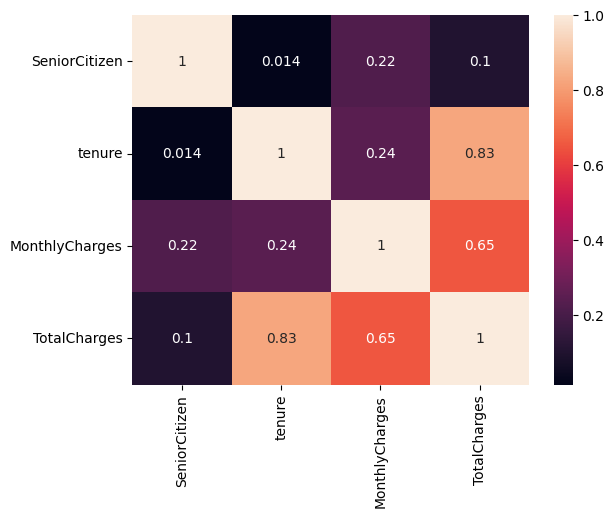

In [33]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

*  Here we can see TotalCharges and MonthlyCharges have positive correlation and same way TotalCharges and tenure have Positive correlation and tenure have positive correlation with TotalCharges but but with MonthlyCharges Having poor correlation 
* SeniorCitizen is having only two value (1,0) thats why it have poor correlation others

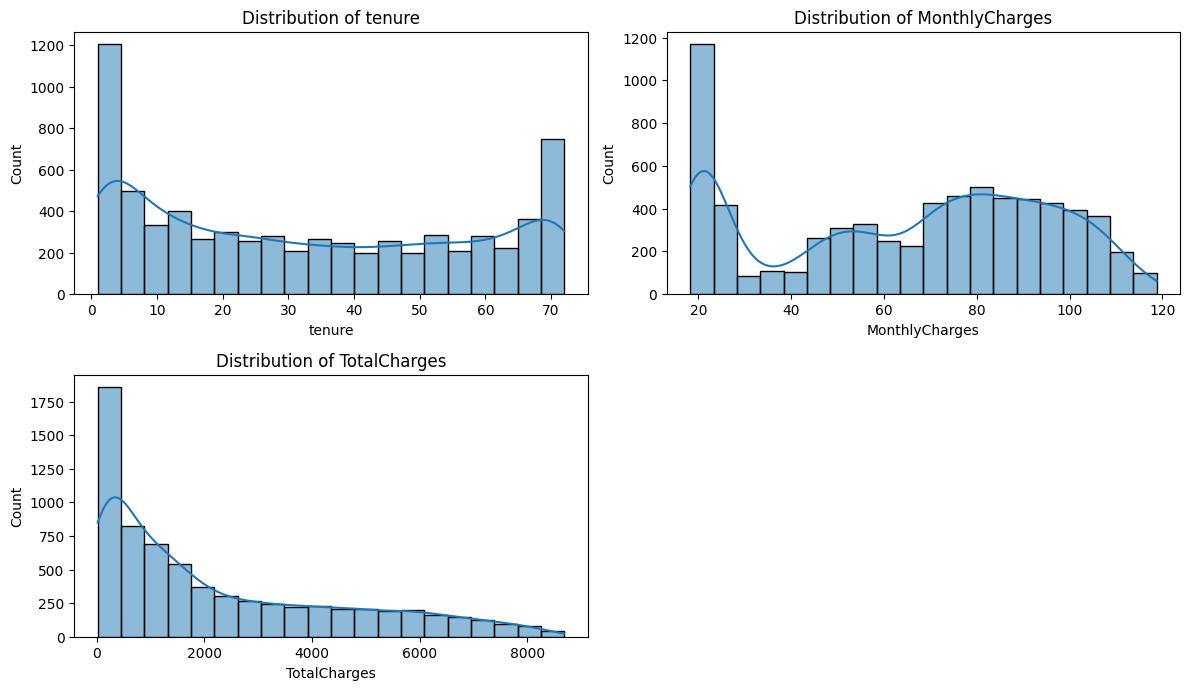

In [35]:
# Visualize the distribution of numerical features
num_cols =['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

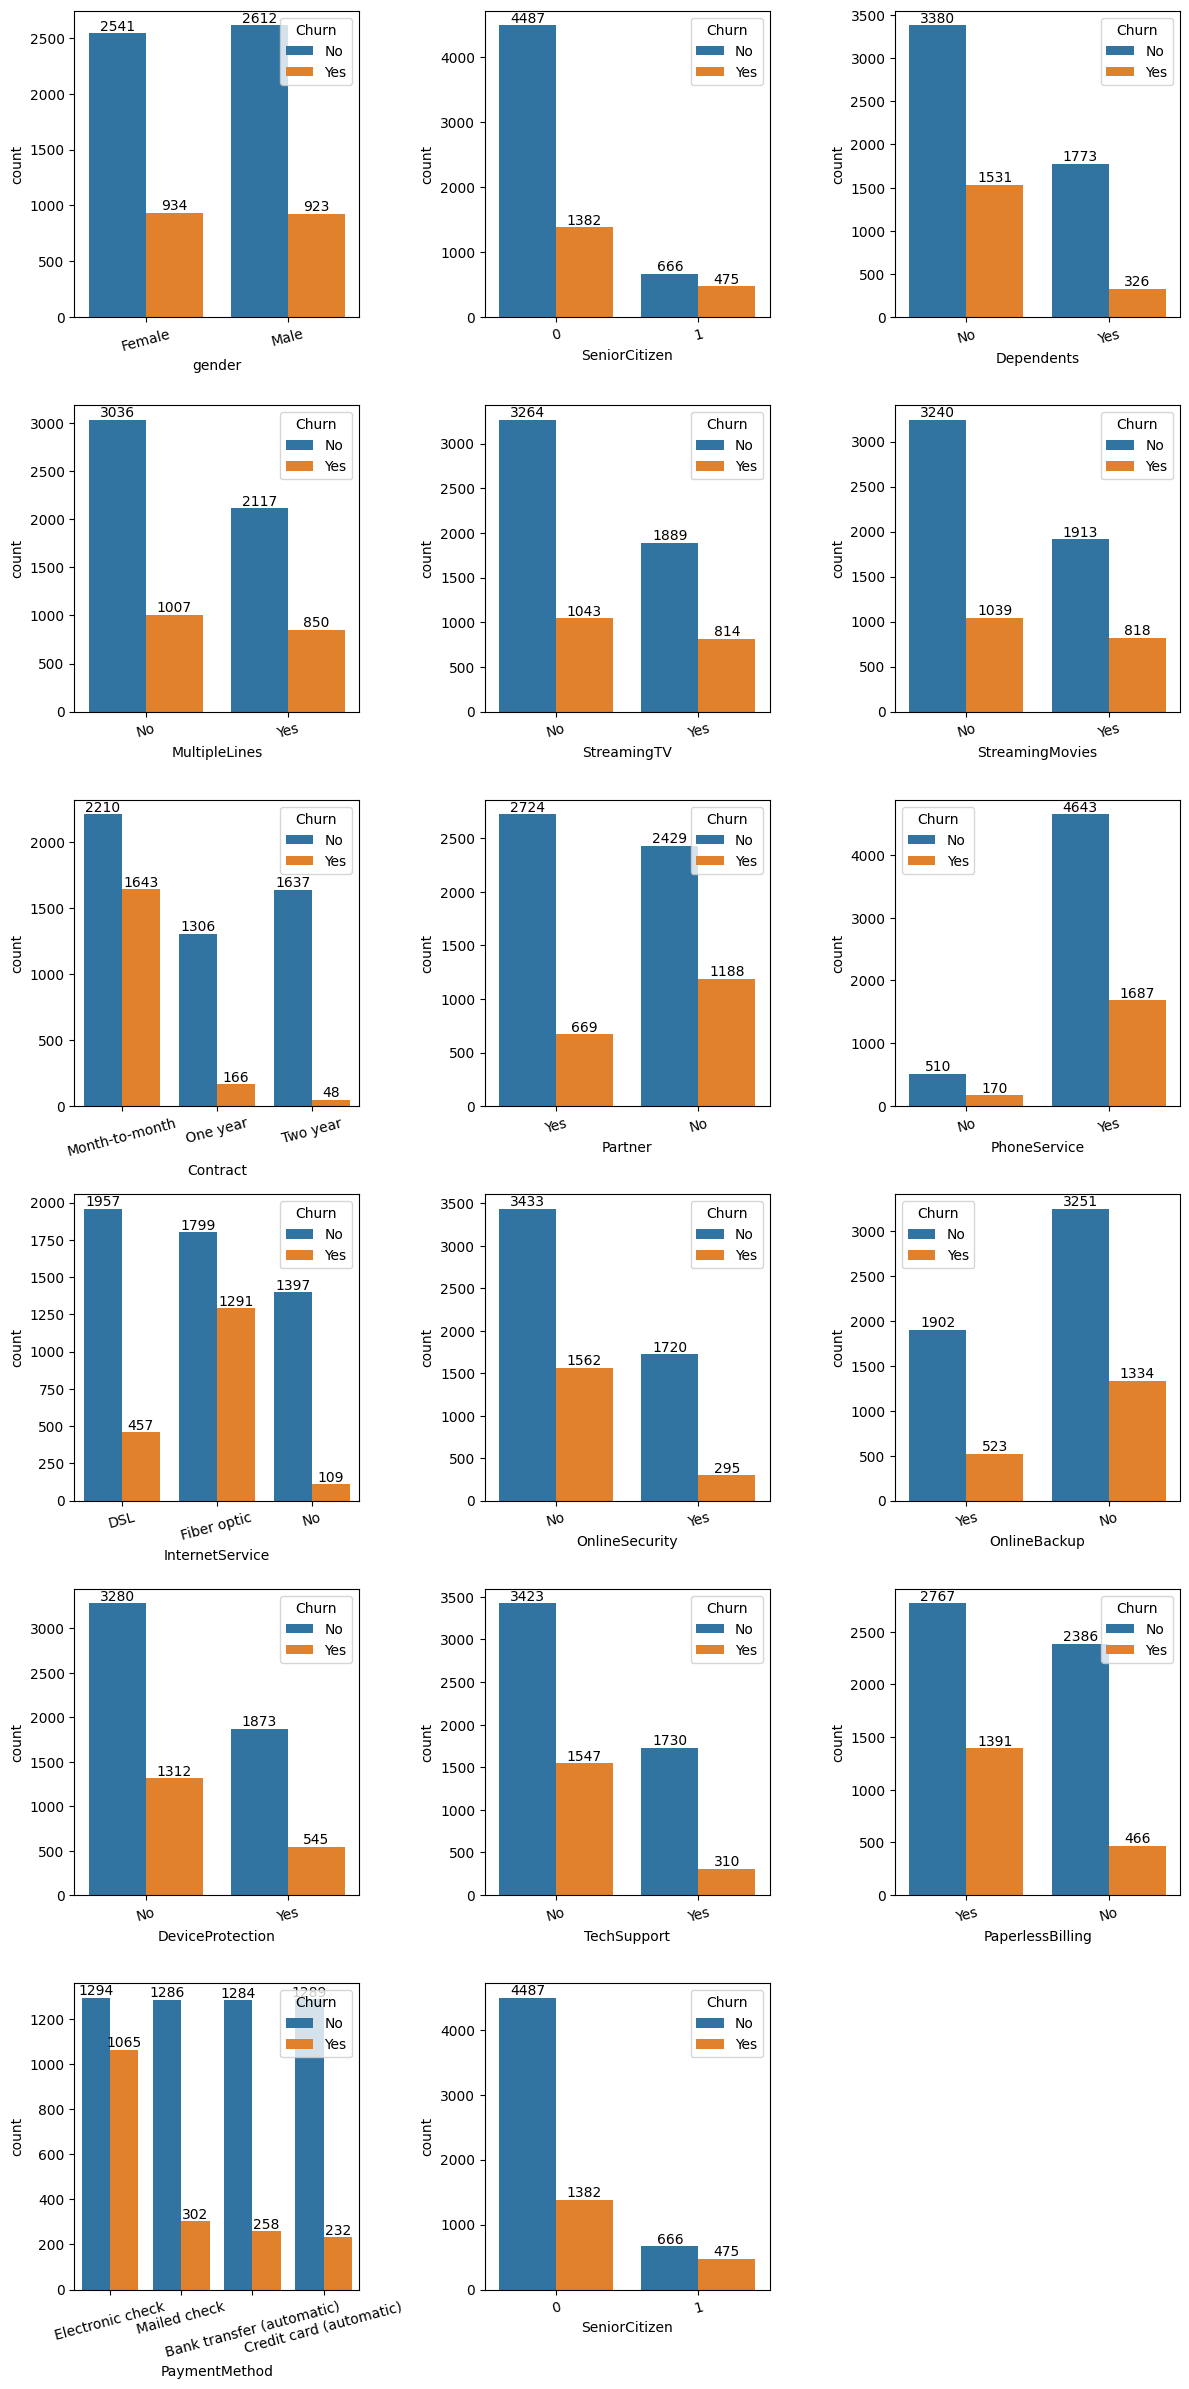

In [36]:
#Count Plot Categorical Columns

label='Churn'

plt.figure(figsize = (12, 24))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(df, x = col, hue = label)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.xticks(rotation = 15)
plt.tight_layout()
plt.show()

 ****gender****
*  Male: 3549 customers (No Churn: 2549, Churn: 939)
* Female: 3483 customers (No Churn: 2625, Churn: 930)
****SeniorCitizen****
* No: 5890 customers (No Churn: 4087, Churn: 1382)
* Yes: 1442 customers (No Churn: 666, Churn: 476)
****Dependents****
* No: 4933 customers (No Churn: 3380, Churn: 1531)
* Yes: 2099 customers (No Churn: 1723, Churn: 326)
****Partner****
* No: 3653 customers (No Churn: 2724, Churn: 669)
* Yes: 1521 customers (No Churn: 2429, Churn: 1188)
****Phone Service****
* No: 6352 customers (No Churn: 510, Churn: 170)
* Yes: 680 customers (No Churn: 4643, Churn: 1687)
****Internet Service****
* DSL: 3096 customers (No Churn: 1957, Churn: 457)
* Fiber optic: 2416 customers (No Churn: 1799, Churn: 1291)
* No: 1520 customers (No Churn: 1397, Churn: 109)
****Online Security****
* Yes: 5017 customers (No Churn: 3433, Churn: 1562)
* No: 2015 customers (No Churn: 1413, Churn: 113)
****Online Backup****
* Yes: 4607customers (No Churn: 1902, Churn: 523)
* No: 2425customers (No Churn: 1720, Churn: 295)
****Device Protection****
* No: 4614 customers (No Churn: 3280, Churn: 1312)
* Yes: 2418 customers (No Churn: 1873, Churn: 545)
****Tech Support****
* No: 4992 customers (No Churn: 3423, Churn: 1547)
* Yes: 2040 customers (No Churn: 1730, Churn: 310)
****Streaming TV****
* No: 4329 customers (No Churn: 3264, Churn: 1043)
* Yes: 2703 customers (No Churn: 11889, Churn: 814)
****Streaming Movies****
* No: 4301 customers (No Churn: 3240, Churn: 1039)
* Yes: 2731 customers (No Churn: 1914, Churn: 818)
****Contract****
* Month-to-month: 3875 customers (No Churn: 2210, Churn: 1643)
* Two year: 1685 customers (No Churn: 1306, Churn: 165)
* One year: 1472 customers (No Churn: 1637, Churn: 48)
**** Paperless Billing****
* Yes: 4168 customers (No Churn: 2767, Churn: 1391)
* No: 2864 customers (No Churn: 2386, Churn: 466)
********Payment Method********
* Mailed check: 2365 customers (No Churn: 1294, Churn: 1065)
* Electronic check: 1604 customers (No Churn: 1286, Churn: 302)
* Bank transfer (automatic): 1542 customers (No Churn: 1284, Churn: 258)
* Credit card (automatic): 1521customers (No Churn: 2200, Churn: 232)

* These insights can help identify patterns influencing customer churn, enabling data-driven decisions for customer retention strategies.




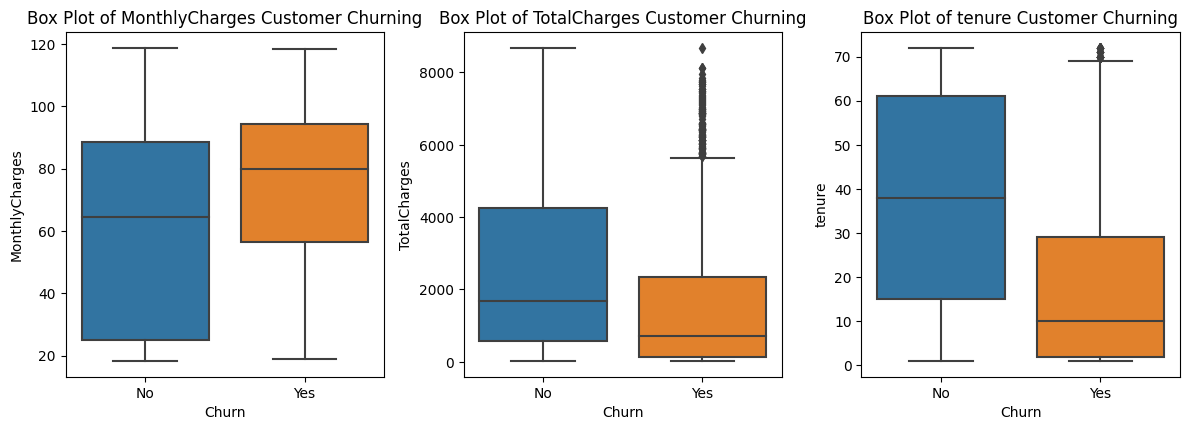

In [37]:
# Box plots to find out outliers in numerical features
features = ['MonthlyCharges', 'TotalCharges','tenure']
target = 'Churn'
plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Box Plot of {col} Customer Churning')
    plt.xlabel('Churn')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

*  Here we can see some outliers are in TotalCharges and tenure * 

****TENURE BY MONTHLYCHARGES****

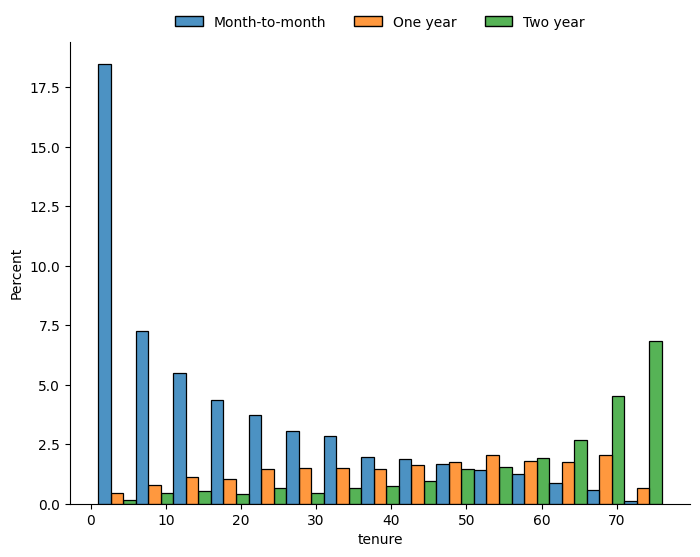

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))


sns.histplot(data=df, x='tenure', hue='Contract', stat='percent',
multiple='dodge', ax=ax, binwidth=5, alpha=0.8)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3,
title='', frameon=False)

sns.despine()  
plt.show()

**DISTRIBUTION OF TARGET VARIABLE**

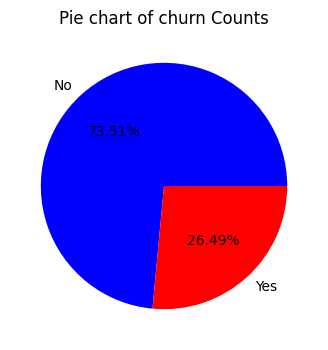

In [39]:

churn_count = df["Churn"].value_counts()
fig = plt.figure(figsize=(7,4))
plt.pie(
    churn_count,
    autopct="%.2f%%",
    labels=churn_count.index,
    colors=["blue", "red"],
)
plt.title("Pie chart of churn Counts")
plt.show()


In [41]:
data_viz = df.copy()
data_viz.loc[:,'Churn'] = data_viz.loc[:, 'Churn'].apply(lambda
x: 'Churn' if x == 'Yes' else 'retain')

In [42]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
    crosstab = pd.crosstab(index=df[x], columns=df[y], normalize='index')
    crosstab = crosstab.reindex(['No', 'Yes'], axis=1)
    
    
columns = data_viz['Churn']

attr_crosstab = pd.DataFrame()

for col in cat_cols:
  # create crosstab for each attribute
    index = data_viz[col]
    ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
    col_titleize = inflection.titleize(col)
    ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
    ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
    attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('Churn', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()
  

,attribute,Churn,retain
0,Payment Method (Electronic check),0.451462,0.548538
1,Contract (Month-to-month),0.426421,0.573579
2,Internet Service (Fiber optic),0.417799,0.582201
3,Senior Citizen (1),0.416301,0.583699
4,Senior Citizen (1),0.416301,0.583699
5,Paperless Billing (Yes),0.334536,0.665464
6,Partner (No),0.328449,0.671551
7,Online Security (No),0.312713,0.687287
8,Dependents (No),0.311749,0.688251
9,Tech Support (No),0.311268,0.688732


**TOP 5 PROBABILITY OF CHURN**

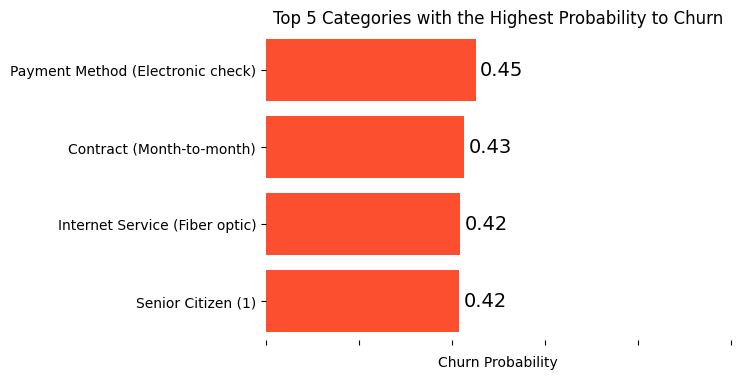

In [43]:
fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(data=attr_crosstab.iloc[:5], x='Churn', y='attribute', ax=ax, palette=['#FC4F30'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

**TOP 5 REAIN PROBABILITY**

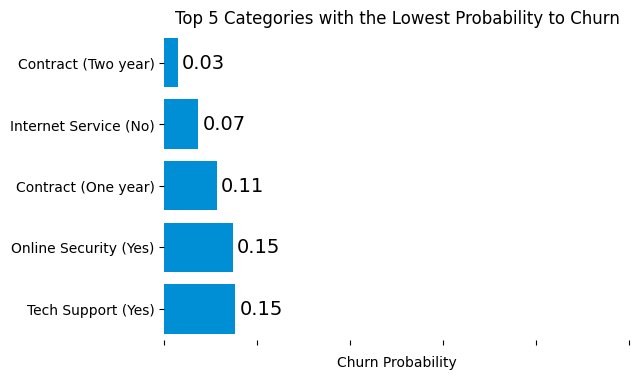

In [44]:
fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(data=attr_crosstab.iloc[-5:].sort_values('Churn'), x='Churn', y='attribute', ax=ax, palette=['#008FD5'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

**CHI2 FOR CATEGORICAL VARIABLES**

In [45]:
from scipy.stats import chi2
import scipy.stats as stats

corr_df=pd.crosstab(df['Churn'],df['gender'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
alpha=0.05
val
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


gender  Female  Male
Churn               
No        2541  2612
Yes        934   923
Chi-squared statistic: 0.491236602618337
P-value: 0.4833762023458479
Degrees of freedom: 1
Expected frequencies table:
[[2554.44721826 2598.55278174]
 [ 920.55278174  936.44721826]]


In [46]:
corr_df=pd.crosstab(df['Churn'],df['Partner'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
alpha=0.05

val
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


Partner    No   Yes
Churn              
No       2429  2724
Yes      1188   669
Chi-squared statistic: 154.26693117310947
P-value: 2.0248561714739414e-35
Degrees of freedom: 1
Expected frequencies table:
[[2658.83038516 2494.16961484]
 [ 958.16961484  898.83038516]]


In [47]:
corr_df=pd.crosstab(df['Churn'],df['Dependents'])
print(corr_df)
corr_df.values
val=stats.chi2_contingency(corr_df)
alpha=0.05

print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


Dependents    No   Yes
Churn                 
No          3380  1773
Yes         1531   326
Chi-squared statistic: 183.99998732389344
P-value: 6.48802519091279e-42
Degrees of freedom: 1
Expected frequencies table:
[[3610.0403709 1542.9596291]
 [1300.9596291  556.0403709]]


In [48]:
corr_df=pd.crosstab(df['Churn'],df['PhoneService'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


PhoneService   No   Yes
Churn                  
No            510  4643
Yes           170  1687
Chi-squared statistic: 0.7766911304348848
P-value: 0.37815502389537725
Degrees of freedom: 1
Expected frequencies table:
[[ 499.86305278 4653.13694722]
 [ 180.13694722 1676.86305278]]


In [ ]:
corr_df=pd.crosstab(df['Churn'],df['MultipleLines'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


In [49]:
corr_df=pd.crosstab(df['Churn'],df['InternetService'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


InternetService   DSL  Fiber optic    No
Churn                                   
No               1957         1799  1397
Yes               457         1291   109
Chi-squared statistic: 728.444400823442
P-value: 6.611624411865297e-159
Degrees of freedom: 2
Expected frequencies table:
[[1774.51383738 2271.43651926 1107.04964337]
 [ 639.48616262  818.56348074  398.95035663]]


In [50]:
corr_df=pd.crosstab(df['Churn'],df['OnlineSecurity'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


OnlineSecurity    No   Yes
Churn                     
No              3433  1720
Yes             1562   295
Chi-squared statistic: 203.08431918101758
P-value: 4.433936702110834e-46
Degrees of freedom: 1
Expected frequencies table:
[[3671.78815977 1481.21184023]
 [1323.21184023  533.78815977]]


In [51]:
corr_df=pd.crosstab(df['Churn'],df['OnlineBackup'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


OnlineBackup    No   Yes
Churn                   
No            3251  1902
Yes           1334   523
Chi-squared statistic: 45.77155596025352
P-value: 1.3287905168142364e-11
Degrees of freedom: 1
Expected frequencies table:
[[3370.40014265 1782.59985735]
 [1214.59985735  642.40014265]]


In [52]:
corr_df=pd.crosstab(df['Churn'],df['DeviceProtection'])
print(corr_df)
observed_data=corr_df.values
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


DeviceProtection    No   Yes
Churn                       
No                3280  1873
Yes               1312   545
Chi-squared statistic: 45.77155596025352
P-value: 1.3287905168142364e-11
Degrees of freedom: 1
Expected frequencies table:
[[3370.40014265 1782.59985735]
 [1214.59985735  642.40014265]]


In [53]:
corr_df=pd.crosstab(df['Churn'],df['TechSupport'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


TechSupport    No   Yes
Churn                  
No           3423  1730
Yes          1547   310
Chi-squared statistic: 187.67842671355896
P-value: 1.0211659988009781e-42
Degrees of freedom: 1
Expected frequencies table:
[[3653.41084165 1499.58915835]
 [1316.58915835  540.41084165]]


In [54]:
corr_df=pd.crosstab(df['Churn'],df['StreamingMovies'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


StreamingMovies    No   Yes
Churn                      
No               3240  1913
Yes              1039   818
Chi-squared statistic: 27.241243208252683
P-value: 1.7958664286018001e-07
Degrees of freedom: 1
Expected frequencies table:
[[3145.4617689 2007.5382311]
 [1133.5382311  723.4617689]]


In [55]:
corr_df=pd.crosstab(df['Churn'],df['StreamingTV'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


StreamingTV    No   Yes
Churn                  
No           3264  1889
Yes          1043   814
Chi-squared statistic: 29.368042482078366
P-value: 5.985662157966025e-08
Degrees of freedom: 1
Expected frequencies table:
[[3166.04436519 1986.95563481]
 [1140.95563481  716.04436519]]


In [56]:
corr_df=pd.crosstab(df['Churn'],df['PaperlessBilling'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


PaperlessBilling    No   Yes
Churn                       
No                2386  2767
Yes                466  1391
Chi-squared statistic: 253.56564922608624
P-value: 4.3362822204401427e-57
Degrees of freedom: 1
Expected frequencies table:
[[2096.48445078 3056.51554922]
 [ 755.51554922 1101.48445078]]


In [57]:
corr_df=pd.crosstab(df['Churn'],df['Contract'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])



Contract  Month-to-month  One year  Two year
Churn                                       
No                  2210      1306      1637
Yes                 1643       166        48
Chi-squared statistic: 1174.7684225475446
P-value: 7.98506189226596e-256
Degrees of freedom: 2
Expected frequencies table:
[[2832.31226819 1082.05649073 1238.63124108]
 [1020.68773181  389.94350927  446.36875892]]


In [58]:
corr_df=pd.crosstab(df['Churn'],df['PaymentMethod'])
print(corr_df)
observed_data=corr_df.values
val=stats.chi2_contingency(corr_df)
print("Chi-squared statistic:", val[0])
print("P-value:", val[1])
print("Degrees of freedom:", val[2])
print("Expected frequencies table:")
print(val[3])


PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                  1284                     1289   
Yes                                  258                      232   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                         1294          1286  
Yes                        1065           302  
Chi-squared statistic: 641.2039257714442
P-value: 1.1761169603808132e-138
Degrees of freedom: 3
Expected frequencies table:
[[1133.51298146 1118.07603424 1734.08373752 1167.32724679]
 [ 408.48701854  402.92396576  624.91626248  420.67275321]]


In [59]:
# Replace target variable in YES and No.
df['Churn'].replace({'Yes':'1','No':'0'},inplace=True)

In [60]:
# conver boolean values to numeric value to perform model building.
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce').astype('int64')
# check data type
df['Churn'].dtypes

dtype('int64')

In [61]:
# Apply one-hot encoding to each categorical variable
cat_cols = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df,cat_cols ,drop_first=True,dtype=int)

# Display the first few rows of the encoded dataset
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,1,...,1,1,1,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,1,...,1,0,1,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,1


# FEATURE SCALING

* Since this dataset is not in normal distribution, I will use min-max scaling for the numerical features

In [62]:
from sklearn.preprocessing import MinMaxScaler


# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [63]:
# Mean of num_cols.
df[num_cols].mean()

tenure            0.443949
MonthlyCharges    0.464066
TotalCharges      0.262122
dtype: float64

In [64]:
# std of num_cols
df[num_cols].std()

tenure            0.345358
MonthlyCharges    0.299152
TotalCharges      0.261576
dtype: float64

# CORRELATION

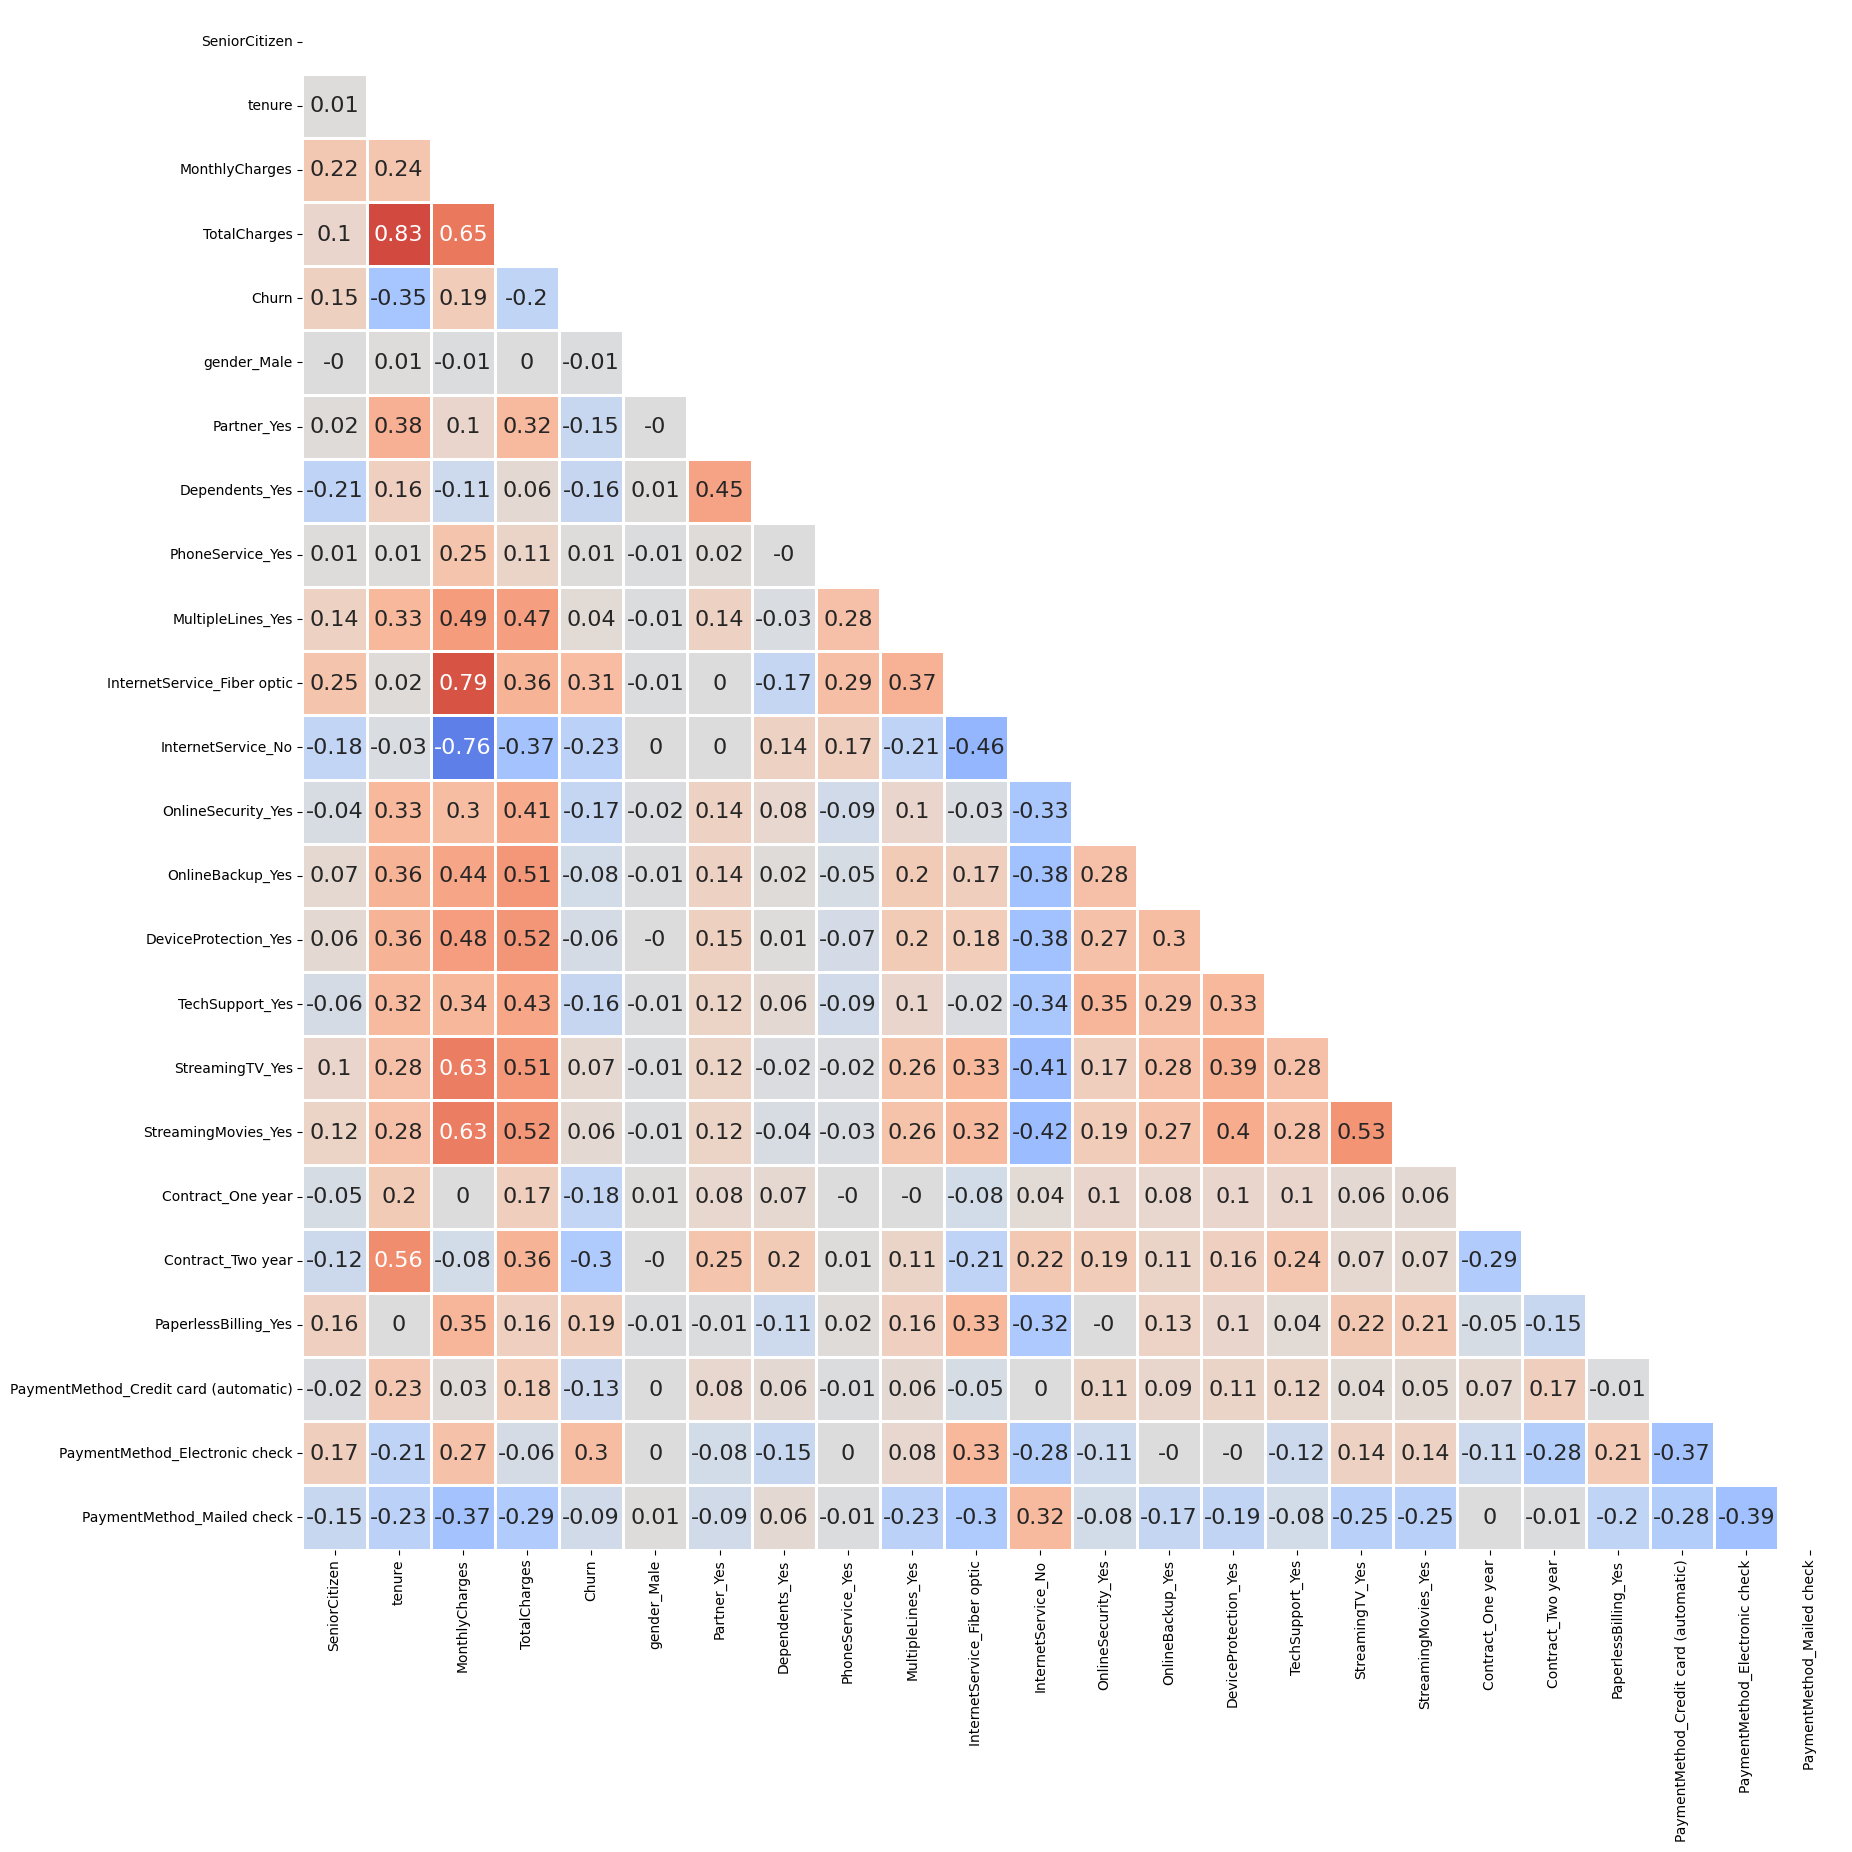

In [65]:
corr_matrix = df.corr().round(2)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

# SPLIT DATA 

In [66]:
y = df['Churn']
X = df.drop('Churn', axis=1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('shape of X',X_train.shape)
print('shape of y',y_train.shape)
print('shape of X',X_test.shape)
print('shape of y',y_test.shape)

shape of X (5608, 23)
shape of y (5608,)
shape of X (1402, 23)
shape of y (1402,)


****RESAMPLING****

* As we can see Datasetis in imbalancs state 73:27 ratio so we have to convert them into balance form by using SMOTE method

In [68]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['churn'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

In [69]:
# Print the value_counts on the original dataset
print(pd.value_counts(pd.Series(y)))

# Print the value_counts 
print(pd.value_counts(pd.Series(y_train_smote)))

# Run compare_plot

Churn
0    5153
1    1857
Name: count, dtype: int64
Churn
0    4072
1    4072
Name: count, dtype: int64


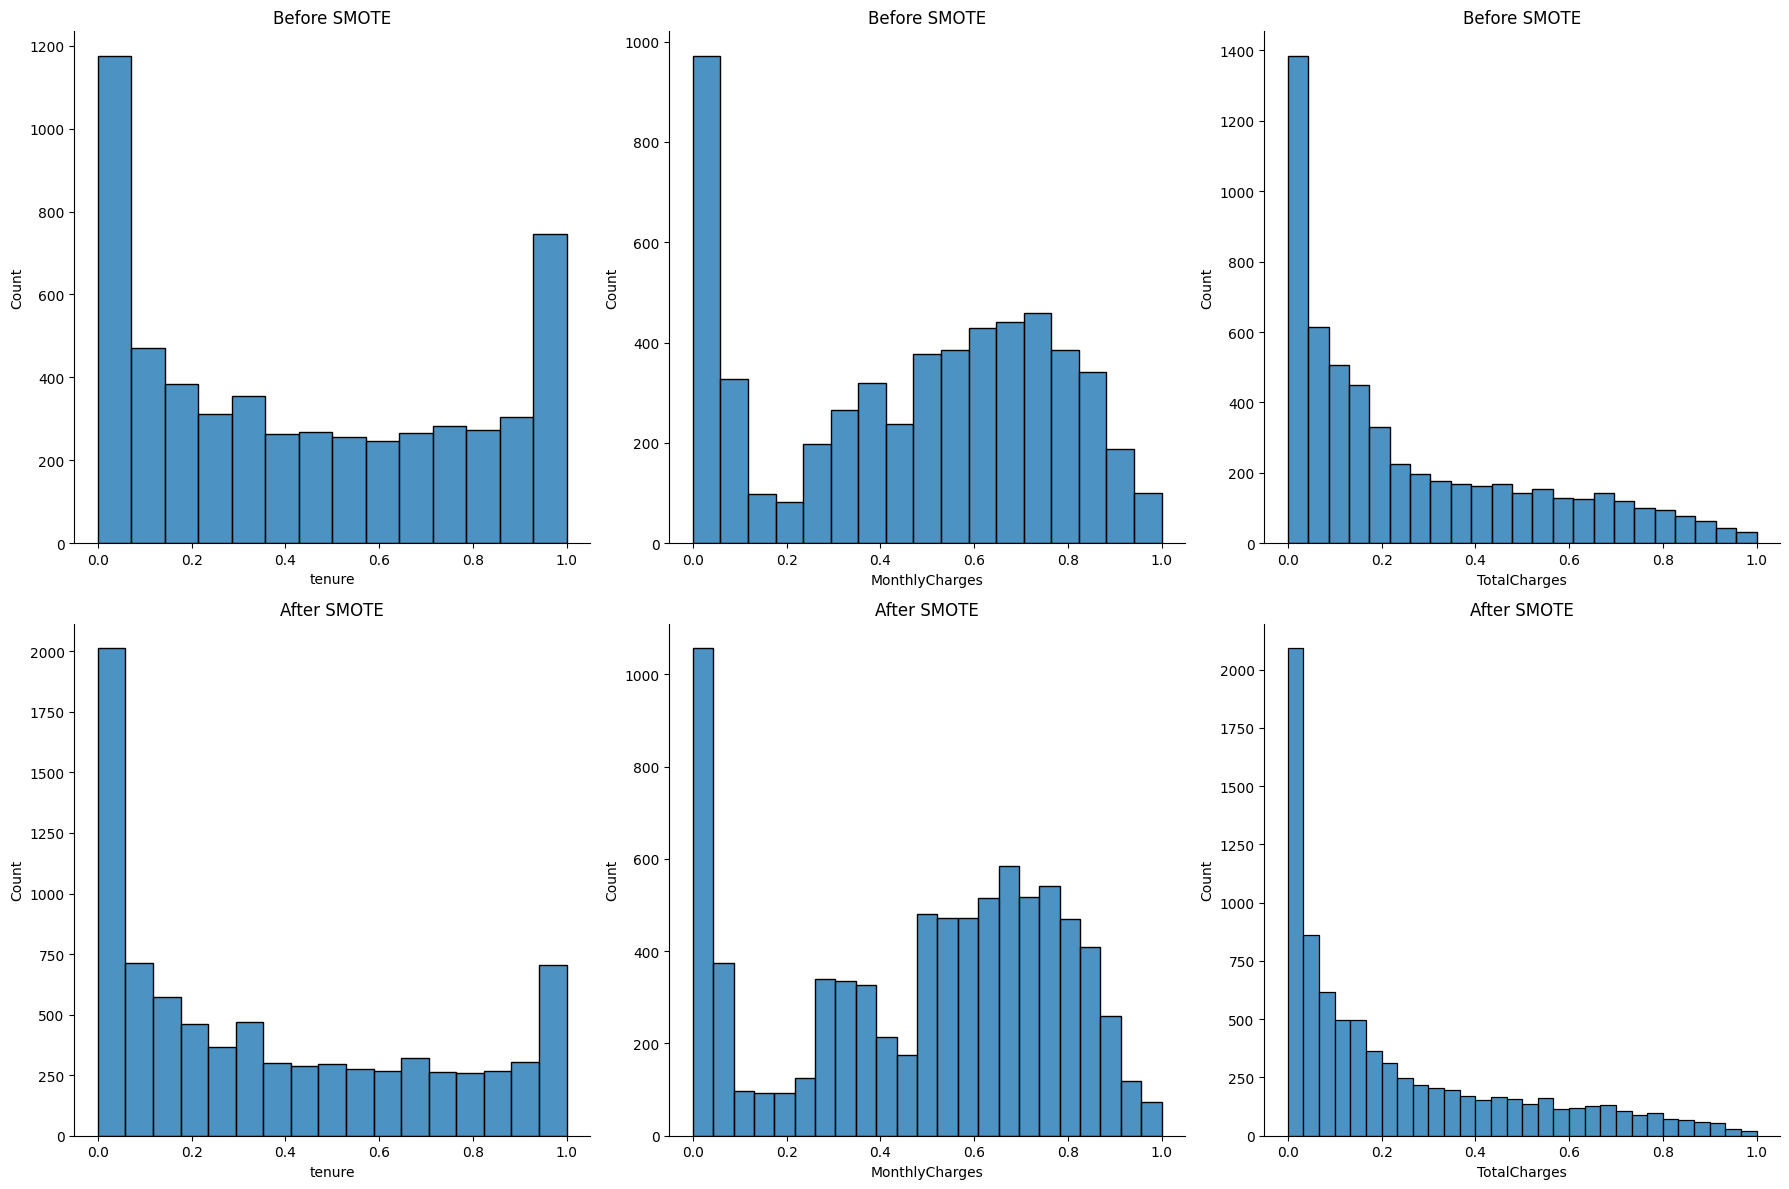

In [70]:
fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]
label='Churn'
for i, col in enumerate(num_cols):
    sns.histplot(data=X_train, x=col,multiple='stack', ax=axes_list[i], alpha=0.8)
    axes_list[i].set_title('Before SMOTE')

for i, col in enumerate(num_cols):
    sns.histplot(data=data_smote, x=col, multiple='stack', ax=axes_list[i+3], alpha=0.8)
    axes_list[i+3].set_title('After SMOTE')

plt.tight_layout()
sns.despine()

plt.show()

In [71]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test.copy()
y_test_model = y_test.copy()

In [72]:
classifiers = {
    "lr": LogisticRegression(),
    "svc": SVC(probability=True),  # Enable probability for ROC/AUC
    "knn": KNeighborsClassifier(),
    "dtree": DecisionTreeClassifier(),
    "xgb":XGBClassifier(),
    "rfc": RandomForestClassifier(),
    "adaboost": AdaBoostClassifier(),
    "gb": GradientBoostingClassifier(),
    "hgb": HistGradientBoostingClassifier(),
}

In [73]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=["Accuracy", "Precision", "F1 Score","recall", "ROC_AUC"])

# Iterate through classifiers and calculate metrics
for name, clf in classifiers.items():
    clf.fit(X_train_model, y_train_model)
    y_pred = clf.predict(X_test_model)

    # Calculate metrics
    accuracy = accuracy_score(y_test_model, y_pred)
    precision = precision_score(y_test_model, y_pred, average='weighted')
    f1 = f1_score(y_test_model, y_pred, average='weighted')
    recall = recall_score(y_test_model, y_pred)


    # Calculate ROC and AUC
    y_scores = clf.predict_proba(X_test_model)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)
    auc = roc_auc_score(y_test_model, y_scores)

    # Store the results in the DataFrame
    results_df.loc[name] = [accuracy, precision,recall, f1,auc]

# Display the results
#print(results_df)
cm=sns.light_palette('purple',as_cmap=True)
s=results_df.style.background_gradient(cmap=cm)
s

,Accuracy,Precision,F1 Score,recall,ROC_AUC
lr,0.756063,0.818768,0.778816,0.772601,0.843433
svc,0.759629,0.809361,0.732087,0.774272,0.815106
knn,0.680456,0.774661,0.716511,0.704847,0.762821
dtree,0.716833,0.761696,0.601246,0.732451,0.676201
xgb,0.763195,0.799544,0.679128,0.775293,0.820995
rfc,0.776034,0.806385,0.682243,0.786412,0.821580
adaboost,0.742511,0.824762,0.822430,0.761675,0.847901
gb,0.756063,0.817271,0.772586,0.772430,0.846320
hgb,0.759629,0.805217,0.713396,0.773606,0.835565


In [74]:
results_df = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy') 
    mean_score = scores.mean()
    results_df[name] = mean_score

    print(f"{name}: {mean_score}")

lr: 0.8024251069900143
svc: 0.7985734664764622
knn: 0.768188302425107
dtree: 0.7265335235378032
xgb: 0.7790299572039943
rfc: 0.7904422253922967
adaboost: 0.8065620542082739
gb: 0.803851640513552
hgb: 0.7921540656205421


**OBSERVATION**
* The Random Forest(RF) and The XGBOOST Classifier(XG) models demonstrate the highest accuracy, around 78, indicating strong predictive power*
* The Random Forest(RF) model has the highest recall, indicating a good ability to identify churn cases, but at the expense of precision*
* The Decision Tree and k-Nearest Neighbors models show lower performance across multiple metrics, indicating room for improvement.*
* The AdaBoost(ADB) has highdt c_score and The GradientBoosting(GB) has highst c_score.
* The Random Forest and Gradient Boosting models provide a balanced trade-off between precision and recall.*

# HYPERTUNNING

In [78]:
param_grids = {
    "rfc": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "adaboost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "gb": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7]
    },
    "hgb": {
        'max_iter': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7]
    },
    "lr":{
    'C':[1.0],  
    'max_iter':[50,100,200],  
    'class_weight':[None], 
    'random_state':[None]
    }

}

In [79]:
classifiers2 = {
    "rfc": RandomForestClassifier(),
    "adaboost": AdaBoostClassifier(),
    "gb": GradientBoostingClassifier(),
    "hgb": HistGradientBoostingClassifier(),
    "lr": LogisticRegression(),
}

In [80]:
for classifier_name, classifier in classifiers2.items():
    print(f"Tuning hyperparameters for {classifier_name}")
    
    # Create a GridSearchCV object
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], cv=3, n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and the corresponding accuracy
    print(f"Best hyperparameters: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_}")

    # Evaluate the model on the test set
    test_accuracy = grid_search.score(X_test, y_test)
    print(f"Test set accuracy: {test_accuracy}\n")

Tuning hyperparameters for rfc
Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation accuracy: 0.7977875249520986
Test set accuracy: 0.8152639087018545

Tuning hyperparameters for adaboost
Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation accuracy: 0.7963607370084568
Test set accuracy: 0.8202567760342369

Tuning hyperparameters for gb
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validation accuracy: 0.7947564589335904
Test set accuracy: 0.8209700427960057

Tuning hyperparameters for hgb
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 100}
Best cross-validation accuracy: 0.7976081273503614
Test set accuracy: 0.8231098430813124

Tuning hyperparameters for lr
Best hyperparameters: {'C': 1.0, 'class_weight': None, 'max_iter': 50, 'random_state': None}
Best cross-validation accuracy: 0.7

In [87]:
# Create a DataFrame to store the results
results_df2 = pd.DataFrame(columns=["Accuracy", "Precision", "F1 Score","recall", "ROC_AUC"])

# Iterate through classifiers and calculate metrics
for name, clf in classifiers2.items():
    clf.fit(X_train_model, y_train_model)
    y_pred = clf.predict(X_test_model)

    # Calculate metrics
    accuracy = accuracy_score(y_test_model, y_pred)
    precision = precision_score(y_test_model, y_pred, average='weighted')
    f1 = f1_score(y_test_model, y_pred, average='weighted')
    recall = recall_score(y_test_model, y_pred)
    
        # Calculate ROC and AUC
    y_scores = clf.predict_proba(X_test_model)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)
    auc = roc_auc_score(y_test_model, y_scores)

    # Store the results in the DataFrame
    results_df2.loc[name] = [accuracy, precision,recall, f1,auc]

# Display the results
#print(results_df)
cm=sns.light_palette('purple',as_cmap=True)
s=results_df2.style.background_gradient(cmap=cm)
s
    
   

,Accuracy,Precision,F1 Score,recall,ROC_AUC
rfc,0.767475,0.799685,0.669782,0.778535,0.819741
adaboost,0.742511,0.824762,0.822430,0.761675,0.847901
gb,0.756063,0.817271,0.772586,0.772430,0.846317
hgb,0.759629,0.805217,0.713396,0.773606,0.835565
lr,0.756063,0.818768,0.778816,0.772601,0.843433


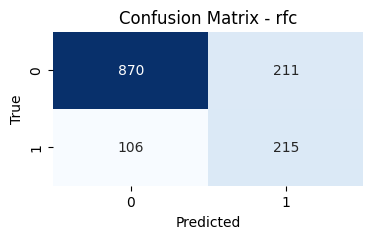

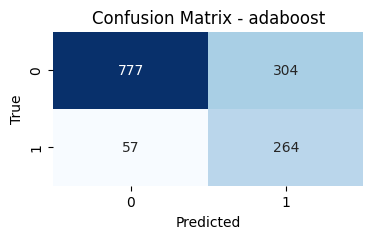

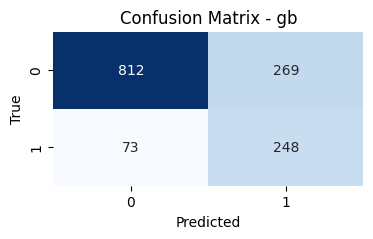

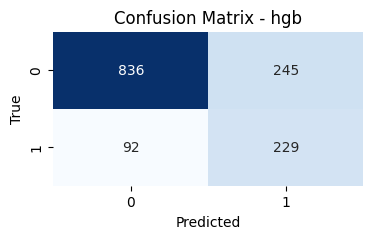

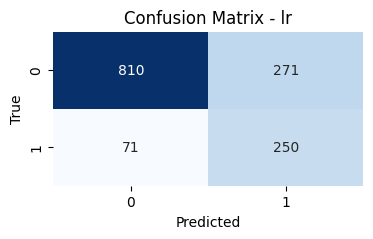

,Accuracy,Precision,F1 Score,recall,ROC_AUC
rfc,0.773894,0.802855,0.669782,0.784015,0.820417
adaboost,0.742511,0.824762,0.822430,0.761675,0.847901
gb,0.756063,0.817271,0.772586,0.772430,0.846317
hgb,0.759629,0.805217,0.713396,0.773606,0.835565
lr,0.756063,0.818768,0.778816,0.772601,0.843433


In [88]:
# Iterate through classifiers and calculate metrics
for name, clf in classifiers2.items():
    clf.fit(X_train_model, y_train_model)
    y_pred = clf.predict(X_test_model)

    # Calculate metrics
    accuracy = accuracy_score(y_test_model, y_pred)
    precision = precision_score(y_test_model, y_pred, average='weighted')
    f1 = f1_score(y_test_model, y_pred, average='weighted')
    recall = recall_score(y_test_model, y_pred)
    y_scores = clf.predict_proba(X_test_model)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test_model)
    auc = roc_auc_score(y_test_model, y_scores)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_model, y_pred)
    results_df2.loc[name] = [accuracy, precision, recall, f1, auc]
    # Display confusion matrix
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
# Display the results
cm = sns.light_palette('purple', as_cmap=True)
s = results_df2.style.background_gradient(cmap=cm)
s


* Here we can see Random Forest gives Best Accuracy and Recall here among all the Classifiers and Adaboost Giving low Accuracy but giveng best Precision,F1 Score and ROC_AUC here
